<a href="https://colab.research.google.com/github/tlinhnguyen2308/ANN/blob/main/Ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

path = kagglehub.dataset_download("alxmamaev/flowers-recognition")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/flowers-recognition


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Chỉ chọn 5 loài hoa
flower_classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
image_size = 64

data = []
labels = []

# Load ảnh và gán nhãn
for i, flower in enumerate(flower_classes):
    folder = os.path.join(path, 'flowers', flower)
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            img = img / 255.0
            data.append(img.flatten())
            labels.append(i)
        except:
            continue

data = np.array(data)
labels = to_categorical(labels, num_classes=len(flower_classes))

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(512, activation='relu', input_shape=(image_size * image_size * 3,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(len(flower_classes), activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.2572 - loss: 3.7340 - val_accuracy: 0.3414 - val_loss: 1.4530
Epoch 2/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3461 - loss: 1.5008 - val_accuracy: 0.4144 - val_loss: 1.3838
Epoch 3/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3895 - loss: 1.4061 - val_accuracy: 0.4155 - val_loss: 1.3766
Epoch 4/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3807 - loss: 1.4013 - val_accuracy: 0.4282 - val_loss: 1.3081
Epoch 5/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3739 - loss: 1.3774 - val_accuracy: 0.4132 - val_loss: 1.3521
Epoch 6/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3999 - loss: 1.3801 - val_accuracy: 0.4259 - val_loss: 1.2855
Epoch 7/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3928 - loss: 1.3532 - val_accuracy: 0.4375 - val_loss: 1.2634
Epoch 8/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3854 - loss: 1.3418 - val_accuracy: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


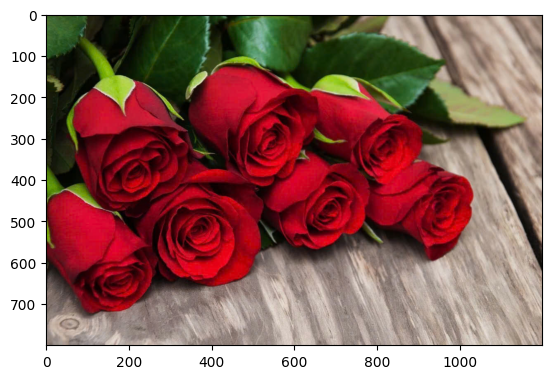

Predicted flower: rose


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


model = Sequential([
    Dense(512, activation='relu', input_shape=(64 * 64 * 3,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

def preprocess_image(image_path, image_size=64):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_size, image_size))
    img = img / 255.0
    img = img.flatten()
    return np.expand_dims(img, axis=0)

image_path = '/content/hhhhh.jpg'
processed_image = preprocess_image(image_path)


predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions)


import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


model = Sequential([
    Dense(512, activation='relu', input_shape=(64 * 64 * 3,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


def preprocess_image(image_path, image_size=64):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_size, image_size))
    img = img / 255.0
    img = img.flatten()
    return np.expand_dims(img, axis=0)

image_path = '/content/hhhhh.jpg'
processed_image = preprocess_image(image_path)
predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions)
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
flower_classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
print(f"Predicted flower: {flower_classes[predicted_class]}")

In [23]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("feyiamujo/human-palm-images")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/human-palm-images


In [24]:
import kagglehub
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Tải dataset từ KaggleHub
path = kagglehub.dataset_download("feyiamujo/human-palm-images")
print("Path to dataset files:", path)

# Cấu hình
image_size = 64
data = []
labels = []

# Tự động lấy các lớp từ tên thư mục con
label_names = sorted(os.listdir(path))
print("Detected classes:", label_names)

# Load ảnh và gán nhãn
for i, label_name in enumerate(label_names):
    folder = os.path.join(path, label_name)
    if not os.path.isdir(folder):
        continue

    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            img = img / 255.0
            data.append(img.flatten())
            labels.append(i)
        except:
            continue

# Chuyển sang numpy array
data = np.array(data)
labels = to_categorical(labels, num_classes=len(label_names))

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

Path to dataset files: /kaggle/input/human-palm-images
Detected classes: ['FEMALE', 'MALE']


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(256, input_shape=(image_size * image_size * 3,), activation='relu'),
    Dense(128, activation='relu'),
    Dense(len(label_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.4854 - loss: 2.9836 - val_accuracy: 0.5000 - val_loss: 0.7766
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.4942 - loss: 0.8480 - val_accuracy: 0.5063 - val_loss: 0.7421
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.6021 - loss: 0.6790 - val_accuracy: 0.7125 - val_loss: 0.6183
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6472 - loss: 0.6262 - val_accuracy: 0.6812 - val_loss: 0.6101
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7270 - loss: 0.5585 - val_accuracy: 0.5000 - val_loss: 0.8862
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.6667 - loss: 0.6097 - val_accuracy: 0.5938 - val_loss: 0.6676
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.6290 - loss: 0.6699 - val_accuracy: 0.6562 - val_loss: 0.6127
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.7187 - loss: 0.5584 - val_accuracy: 0.7000 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


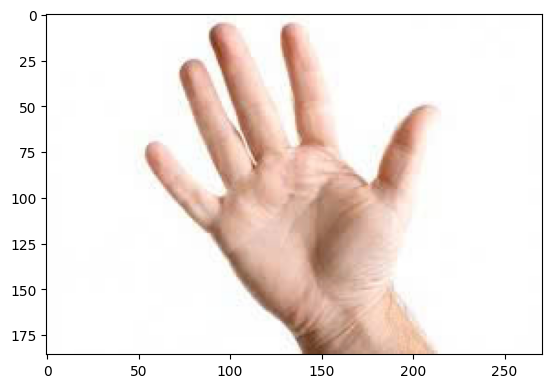

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6585 - loss: 0.6282
Predicted class: 0
Female


In [29]:
def preprocess_image(image_path, image_size=64):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_size, image_size))
    img = img / 255.0
    img = img.flatten()
    return np.expand_dims(img, axis=0)

image_path = '/content/bàn tay.jpg'
processed_image = preprocess_image(image_path)
predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions)
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
loss, acc = model.evaluate(X_test, y_test)

print('Predicted class:', predicted_class)
if predicted_class == 0 :
    print("Female")
elif predicted_class == 1:
    print("Male")
else:
    print("Lớp không xác định.")


In [35]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nguyentrongdai/vietnamese-currency")

print("Path to dataset files:", path)

100%|██████████| 238M/238M [00:01<00:00, 157MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nguyentrongdai/vietnamese-currency/versions/1


In [36]:
import kagglehub
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Tải dataset từ KaggleHub
path = kagglehub.dataset_download("nguyentrongdai/vietnamese-currency")
print("Path to dataset files:", path)

# Cấu hình
image_size = 64
data = []
labels = []

# Tự động lấy các lớp từ tên thư mục con
label_names = sorted(os.listdir(os.path.join(path, 'dataset'))) # Correct the path to access the 'dataset' subfolder
print("Detected classes:", label_names)

# Load ảnh và gán nhãn
for i, label_name in enumerate(label_names):
    folder = os.path.join(path, 'dataset', label_name) # Correct the path to access image folders
    if not os.path.isdir(folder):
        continue

    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            if img is None: # Check if image was loaded successfully
                print(f"Failed to load image: {img_path}")
                continue
            img = cv2.resize(img, (image_size, image_size))
            img = img / 255.0
            data.append(img.flatten())
            labels.append(i)
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")
            continue

# Chuyển sang numpy array
data = np.array(data)
labels = to_categorical(labels, num_classes=len(label_names))

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

Path to dataset files: /kaggle/input/vietnamese-currency
Detected classes: ['000000', '000200', '000500', '001000', '002000', '005000', '010000', '020000', '050000', '100000', '200000', '500000', 'ngtrdaiDataset.data']


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(256, input_shape=(image_size * image_size * 3,), activation='relu'),
    Dense(128, activation='relu'),
    Dense(len(label_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.1506 - loss: 3.5405 - val_accuracy: 0.2486 - val_loss: 2.4751
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.2986 - loss: 2.1466 - val_accuracy: 0.3039 - val_loss: 2.0797
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.3608 - loss: 1.9104 - val_accuracy: 0.3757 - val_loss: 1.8317
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.4253 - loss: 1.6504 - val_accuracy: 0.3923 - val_loss: 1.7226
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.4848 - loss: 1.5291 - val_accuracy: 0.4475 - val_loss: 1.6335
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.5448 - loss: 1.4150 - val_accuracy: 0.4457 - val_loss: 1.7292
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.5515 - loss: 1.3651 - val_accuracy: 0.4530 - val_loss: 1.6131
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.6100 - loss: 1.1721 - val_accuracy: 0.4420 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


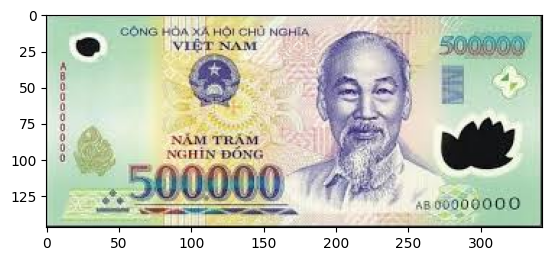

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5563 - loss: 1.2326
Predicted class: 11
500000 đồng


In [49]:
def preprocess_image(image_path, image_size=64):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_size, image_size))
    img = img / 255.0
    img = img.flatten()
    return np.expand_dims(img, axis=0)

image_path = '/content/500000.jpg'
processed_image = preprocess_image(image_path)
predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions)
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
loss, acc = model.evaluate(X_test, y_test)
print('Predicted class:', predicted_class)
if predicted_class == 1:
    print("200 đồng")
elif predicted_class == 2:
    print("500 đồng")
elif predicted_class == 3:
    print("1000 đồng")
elif predicted_class == 4:
    print("2000 đồng")
elif predicted_class == 5:
    print("5000 đồng")
elif predicted_class == 6:
    print("10000 đồng")
elif predicted_class == 7:
    print("20000 đồng")
elif predicted_class == 8:
    print("50000 đồng")
elif predicted_class == 9:
    print("100000 đồng")
elif predicted_class == 10:
    print("200000 đồng")
elif predicted_class == 11:
    print("500000 đồng")

else:
    print("Lớp không xác định hoặc chưa được gán tên.")


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nguyentrongdai/vietnamese-foods-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/vietnamese-foods-dataset


In [ ]:
import kagglehub
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Tải dataset
path = kagglehub.dataset_download("nguyentrongdai/vietnamese-foods-dataset")
path = os.path.join(path, "dataset")

print("Dữ liệu nằm tại:", path)

# Danh sách món ăn muốn dùng
food_classes = ['banh_xeo', 'banh_bot_loc', 'banh_cong', 'banh_da_lon', 'banh_khot']
image_size = 64

data = []
labels = []

# Load ảnh và gán nhãn
for i, food in enumerate(food_classes):
    folder = os.path.join(path, food)
    if not os.path.exists(folder):
        print(f" Không tìm thấy thư mục: {folder}")
        continue
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            img = img / 255.0
            data.append(img.flatten())
            labels.append(i)
        except Exception as e:
            print(f" Lỗi khi xử lý ảnh {filename}: {e}")
            continue

# Chuyển sang numpy array
data = np.array(data)
labels = to_categorical(labels, num_classes=len(food_classes))

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)



Dữ liệu nằm tại: /kaggle/input/vietnamese-foods-dataset/dataset


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(512, activation='relu', input_shape=(image_size * image_size * 3,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(len(food_classes), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.2118 - loss: 5.5499 - val_accuracy: 0.2787 - val_loss: 1.5885
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.2242 - loss: 1.8686 - val_accuracy: 0.3484 - val_loss: 1.5467
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - accuracy: 0.2751 - loss: 1.5939 - val_accuracy: 0.3380 - val_loss: 1.5259
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.3356 - loss: 1.5285 - val_accuracy: 0.4146 - val_loss: 1.4873
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 0.3775 - loss: 1.4780 - val_accuracy: 0.3624 - val_loss: 1.4768
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.3326 - loss: 1.4821 - val_accuracy: 0.3171 - val_loss: 1.5141
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.3118 - loss: 1.4933 - val_accuracy: 0.2892 - val_loss: 1.5465
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.3276 - loss: 1.5189 - val_accuracy: 0.3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


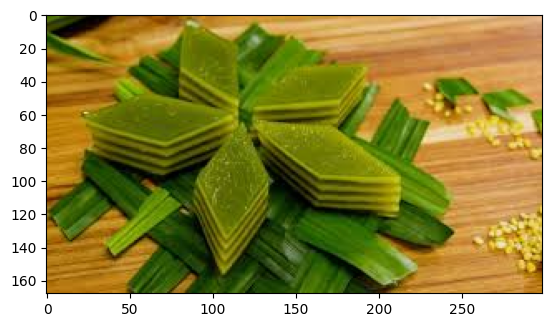

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5563 - loss: 1.2326
Predicted class: 4
Bánh da lợn


In [56]:
def preprocess_image(image_path, image_size=64):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_size, image_size))
    img = img / 255.0
    img = img.flatten()
    return np.expand_dims(img, axis=0)

image_path = '/content/bánh da lơn.jpg'
processed_image = preprocess_image(image_path)
predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions)
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
loss, acc = model.evaluate(X_test, y_test)
print('Predicted class:', predicted_class)
if predicted_class == 1:
    print("Bánh xèo")
elif predicted_class == 2:
    print("Bánh bột lọc")
elif predicted_class == 3:
    print("Bánh cống")
elif predicted_class == 4:
    print("Bánh da lợn")
elif predicted_class == 5:
    print("Bánh khọt")
else:
    print("Lớp không xác định hoặc chưa được gán tên.")

In [60]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zeyadkhalid/faceshape-processed")

print("Path to dataset files:", path)

100%|██████████| 79.8M/79.8M [00:00<00:00, 177MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/zeyadkhalid/faceshape-processed/versions/1


In [61]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
import kagglehub

# Tải dữ liệu
base_path = kagglehub.dataset_download("zeyadkhalid/faceshape-processed")
dataset_path = os.path.join(base_path, "dataset")

# Xác định lớp từ thư mục con trong `train`
train_path = os.path.join(dataset_path, "train")
face_classes = [folder for folder in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, folder))]
face_classes.sort()
print("Detected classes:", face_classes)

image_size = 64
X_train, y_train = [], []
X_test, y_test = [], []

# Hàm đọc ảnh
def load_images_from_folder(folder_path, label_index, data_list, label_list):
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            try:
                img = cv2.resize(img, (image_size, image_size))
                img = img / 255.0
                data_list.append(img.flatten())
                label_list.append(label_index)
            except Exception as e:
                print("Error loading image:", img_path)

# Đọc ảnh train
for i, face_shape in enumerate(face_classes):
    load_images_from_folder(os.path.join(train_path, face_shape), i, X_train, y_train)

# Đọc ảnh test
test_path = os.path.join(dataset_path, "test")
for i, face_shape in enumerate(face_classes):
    load_images_from_folder(os.path.join(test_path, face_shape), i, X_test, y_test)

# Chuyển về numpy array
X_train = np.array(X_train)
y_train = to_categorical(y_train, num_classes=len(face_classes))
X_test = np.array(X_test)
y_test = to_categorical(y_test, num_classes=len(face_classes))



Detected classes: ['Heart', 'Oblong', 'Oval', 'Round', 'Square']


In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



model = Sequential([
    Dense(256, input_shape=(image_size * image_size * 3,), activation='relu'),
    Dense(128, activation='relu'),
    Dense(len(face_classes), activation='softmax') # Change label_names to face_classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.2647 - loss: 2.9927 - val_accuracy: 0.3948 - val_loss: 1.3953
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.3764 - loss: 1.5138 - val_accuracy: 0.4168 - val_loss: 1.4549
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.4331 - loss: 1.4119 - val_accuracy: 0.4459 - val_loss: 1.3143
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.4584 - loss: 1.2956 - val_accuracy: 0.4138 - val_loss: 1.4145
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.4367 - loss: 1.3431 - val_accuracy: 0.4078 - val_loss: 1.3965
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.4644 - loss: 1.2865 - val_accuracy: 0.4429 - val_loss: 1.4232
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.4868 - loss: 1.2265 - val_accuracy: 0.4659 - val_loss: 1.2779
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.4744 - loss: 1.2611 - val_a

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(512, activation='relu', input_shape=(image_size * image_size * 3,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(len(face_classes), activation='softmax')
])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


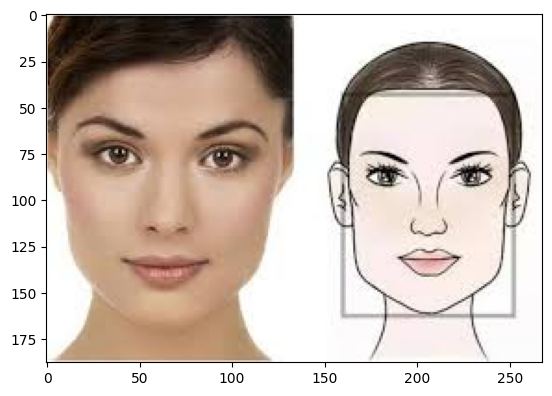

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.1267 - loss: 1.6117
Predicted class: 3
Mặt oval


In [76]:
def preprocess_image(image_path, image_size=64):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_size, image_size))
    img = img / 255.0
    img = img.flatten()
    return np.expand_dims(img, axis=0)

image_path = '/content/ov.jpg'
processed_image = preprocess_image(image_path)
predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions)
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
loss, acc = model.evaluate(X_test, y_test)
print('Predicted class:', predicted_class)
if predicted_class == 1:
    print("Mặt trái tim")
elif predicted_class == 2:
    print("Mặt oblong")
elif predicted_class == 3:
    print("Mặt oval")
elif predicted_class == 4:
    print("Mặt tròn")
elif predicted_class == 5:
    print("Mặt vuông")
else:
    print("Lớp không xác định hoặc chưa được gán tên.")
